In [12]:
import RPi.GPIO as GPIO
import time

MONITOR_PIN = 4

GPIO.setmode(GPIO.BCM)

try:
    print('按下 Ctrl-C 可停止程式')
    while True:
        GPIO.setup(MONITOR_PIN, GPIO.OUT)
        GPIO.output(MONITOR_PIN, GPIO.LOW)
        time.sleep(0.1)

        count = 0
        start_time = time.time()
        GPIO.setup(MONITOR_PIN, GPIO.IN)
        while (GPIO.input(MONITOR_PIN) == GPIO.LOW):
            count += 1
        end_time = time.time()

        print('count={}, time={:.02f}'.format(count, end_time-start_time))
except KeyboardInterrupt:
    print('關閉程式')
finally:
    GPIO.cleanup()

按下 Ctrl-C 可停止程式
count=10005, time=0.07
count=9992, time=0.07
count=9903, time=0.07
count=9795, time=0.07
count=9912, time=0.07
count=9773, time=0.07
count=9799, time=0.07
count=9830, time=0.07
count=9863, time=0.07
count=9857, time=0.07
count=9917, time=0.07
count=9863, time=0.07
count=9876, time=0.07
count=9820, time=0.07
count=9873, time=0.07
count=9815, time=0.07
count=9807, time=0.07
count=9845, time=0.07
count=9906, time=0.07
count=9866, time=0.07
count=9823, time=0.07
count=9850, time=0.07
count=9817, time=0.07
count=9771, time=0.07
count=9854, time=0.07
count=9891, time=0.07
count=9764, time=0.07
count=9896, time=0.07
count=9867, time=0.07
count=9837, time=0.07
count=9877, time=0.07
count=9900, time=0.07
count=9846, time=0.07
count=9827, time=0.07
count=9845, time=0.07
count=9843, time=0.07
count=9795, time=0.07
count=9868, time=0.07
count=9843, time=0.07
count=9877, time=0.07
count=9799, time=0.07
count=9862, time=0.07
count=9778, time=0.07
count=9817, time=0.07
count=9849, tim

### [RASPBERRY PI 3 MODEL B 利用光敏電阻進行測光](https://blog.everlearn.tw/%E7%95%B6-python-%E9%81%87%E4%B8%8A-raspberry-pi/raspberry-pi-3-model-b-%E5%88%A9%E7%94%A8%E5%85%89%E6%95%8F%E9%9B%BB%E9%98%BB%E9%80%B2%E8%A1%8C%E6%B8%AC%E5%85%89)
### [如何利用 RASPBERRY PI 3 MODEL 3 量測 RC 電路量之電阻值](https://blog.everlearn.tw/%E7%95%B6-python-%E9%81%87%E4%B8%8A-raspberry-pi/%E5%A6%82%E4%BD%95%E5%88%A9%E7%94%A8-raspberry-pi-3-model-3-%E9%87%8F%E6%B8%AC-rc-%E9%9B%BB%E8%B7%AF%E9%87%8F%E4%B9%8B%E9%9B%BB%E9%98%BB%E5%80%BC)
![RC電路]( rc_circuit_架構圖.png)
![RC](Series_RC_capacitor_voltage.svg)
 $τ=R×C=1K×1μ=(1×10^3)×(1×10^-6)=10^-3$

![RPi RC]( photocell_rc_bb.png)

In [51]:
'''
數位電路通常用高電位表示 1，而且有所謂的 VIH，只要超過這個數值的電位差，就會被當作高電位，也就是 1

假設 Raspberry Pi 3 Model B 的 VIH 也是 1.3V。

'''
import RPi.GPIO as GPIO
import time

PIN = 4

GPIO.setmode(GPIO.BCM)
tt = []
try:
    print('按下 Ctrl-C 可停止程式')
    while True:
        GPIO.setup(PIN, GPIO.OUT)
        GPIO.output(PIN, GPIO.LOW)
        time.sleep(1)
        print("開始充電")
        start_time = time.time()
        GPIO.setup(PIN, GPIO.IN)
        while (GPIO.input(PIN) != GPIO.HIGH):
            next
        end_time = time.time()
        tt.append(end_time-start_time)
        print('時間={}秒'.format(end_time-start_time))
except KeyboardInterrupt:
    print('關閉程式')
finally:
    GPIO.cleanup()

按下 Ctrl-C 可停止程式
開始充電
時間=0.015125751495361328秒
開始充電
時間=0.015103816986083984秒
開始充電
時間=0.015044212341308594秒
開始充電
時間=0.015050888061523438秒
開始充電
時間=0.014870166778564453秒
開始充電
時間=0.015074014663696289秒
開始充電
時間=0.015007734298706055秒
開始充電
時間=0.01517629623413086秒
開始充電
時間=0.015031576156616211秒
開始充電
時間=1.0514886379241943秒
開始充電
時間=1.081918478012085秒
開始充電
時間=1.1738183498382568秒
開始充電
時間=1.2166802883148193秒
開始充電
時間=1.2323932647705078秒
開始充電
時間=0.08994770050048828秒
開始充電
時間=0.049657344818115234秒
開始充電
時間=0.0509645938873291秒
開始充電
時間=0.04842066764831543秒
開始充電
時間=0.051177024841308594秒
關閉程式


3.299999999986485


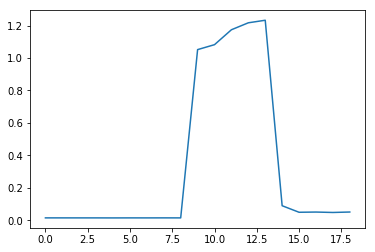

In [52]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

def charge(t,tao):
    return np.float(3.3 * (1-math.exp(-t/tao)))

R=1.0*math.pow(10,3)
C = 47 * pow(10,-6)

Tao = R * C
n = len(tt)
y = np.array([charge(x,Tao) for x in tt])
#plt.plot(y)
plt.plot(tt)
print(max(y))

In [53]:
import math

def charge(t,tao):
    vout = 3.3 * (1-math.exp(-t/tao))
    return vout

R=1.0*math.pow(10,3)
C = 47 * pow(10,-6)

Tao = R * C
print(Tao)
Vih = 1.3
#t = -0.1 * math.log(1-1.3/3.3)
t = 0.06
print(t)
print(charge(t,Tao))

0.047
0.06
2.379348103035094


In [54]:
import RPi.GPIO as GPIO
import time

MONITOR_PIN = 4

GPIO.setmode(GPIO.BCM)
cnt=[]
try:
    print('按下 Ctrl-C 可停止程式')
    while True:
        GPIO.setup(MONITOR_PIN, GPIO.OUT)
        GPIO.output(MONITOR_PIN, GPIO.LOW)
        time.sleep(0.1)

        count = 0
        start_time = time.time()
        GPIO.setup(MONITOR_PIN, GPIO.IN)
        while (GPIO.input(MONITOR_PIN) == GPIO.LOW):
            count += 1
        end_time = time.time()
        cnt.append(count)
        print('count={}, time={:.02f}'.format(count, end_time-start_time))
except KeyboardInterrupt:
    print('關閉程式')
finally:
    GPIO.cleanup()

按下 Ctrl-C 可停止程式
count=7676, time=0.05
count=7716, time=0.05
count=7772, time=0.05
count=7542, time=0.05
count=7476, time=0.05
count=7507, time=0.05
count=7545, time=0.05
count=7460, time=0.05
count=7473, time=0.05
count=7578, time=0.05
count=7525, time=0.05
count=7559, time=0.05
count=7566, time=0.05
count=7564, time=0.05
count=7515, time=0.05
count=7567, time=0.05
count=7597, time=0.05
count=7693, time=0.05
count=7597, time=0.05
count=7662, time=0.05
count=8344, time=0.05
count=9010, time=0.06
count=9113, time=0.06
count=13457, time=0.09
count=18668, time=0.13
count=111867, time=0.74
count=182321, time=1.20
count=184499, time=1.22
count=188654, time=1.24
count=190868, time=1.26
count=191985, time=1.26
count=194697, time=1.28
count=196205, time=1.29
count=150172, time=0.99
count=16227, time=0.11
count=10837, time=0.07
count=8747, time=0.06
count=7915, time=0.05
count=7714, time=0.05
count=7615, time=0.05
count=7579, time=0.05
關閉程式


3.2999999980615877


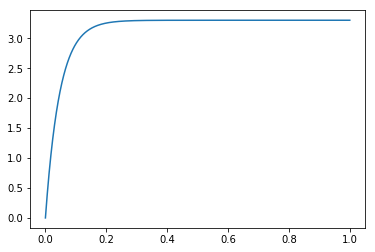

In [55]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

def charge(t,tao):
    return np.float(3.3 * (1-math.exp(-t/tao)))

R=1.0*math.pow(10,3)
C = 47 * pow(10,-6)

Tao = R * C
t = np.arange(0, 1.0, 0.001, dtype=float);
y = np.array([charge(x,Tao) for x in t])
plt.plot(t,y)
print(max(y))